#### ARIMA
Auto Regressive Integrated Moving Average

AR - Auto Regressive -
    -   The auto regressive component involves in predicting the future values based on the past values.
    -   It assumes that the future values are a linear combination of past observation.
    -   The first parameter (p) represents the order of this auto regressive component , including how many past observations are considered. 

I - Integrated -
    -   This uses differencing in the data points to make our daa stationary to apply the model in it.
    -   This is represented by the second parameter d , indicate how many times we need to perform differencing to achieve stationarity.

MA - Moving Average - 
    -   The average componene , for a given fixed duration , and reducing the residulas to ensure stationairty.
    -   This helps in capturing short term fluctuation.
    -   This paramter is denoted with term q

In [51]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA


In [52]:
np.random.seed(42)
date_range=pd.date_range(start='2022-01-01',periods=100,freq='B')
data={'Date':date_range,'Price':np.cumsum(np.random.normal(size=100))}
df=pd.DataFrame(data)
df.set_index('Date',inplace=True)

In [53]:
df.head(10)

,Price
Date,
2022-01-03,0.496714
2022-01-04,0.358450
2022-01-05,1.006138
2022-01-06,2.529168
2022-01-07,2.295015
2022-01-10,2.060878
2022-01-11,3.640091
2022-01-12,4.407525
2022-01-13,3.938051


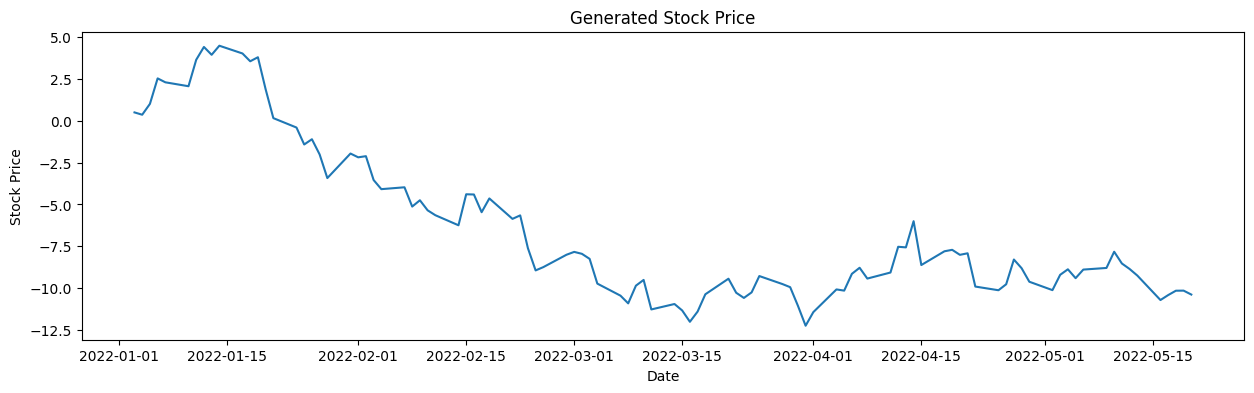

In [54]:
plt.figure(figsize=(15,4))
plt.plot(df['Price'])
plt.title('Generated Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [55]:
model=ARIMA(df['Price'],order=(1,0,1))
result=model.fit()

c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [56]:
future_steps=10
future_dates=pd.date_range(start=df.index[-1]+pd.DateOffset(days=1),periods=future_steps,freq='B')
print(future_dates)

DatetimeIndex(['2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-27', '2022-05-30', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03'],
              dtype='datetime64[ns]', freq='B')


In [57]:
predictions=result.predict(start=len(df),end=len(df)+future_steps-1,typ='levels')


c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [58]:
predictions

2022-05-23   -10.305287
2022-05-24   -10.226544
2022-05-25   -10.149123
2022-05-26   -10.073003
2022-05-27    -9.998161
2022-05-30    -9.924577
2022-05-31    -9.852228
2022-06-01    -9.781095
2022-06-02    -9.711156
2022-06-03    -9.642392
Freq: B, Name: predicted_mean, dtype: float64

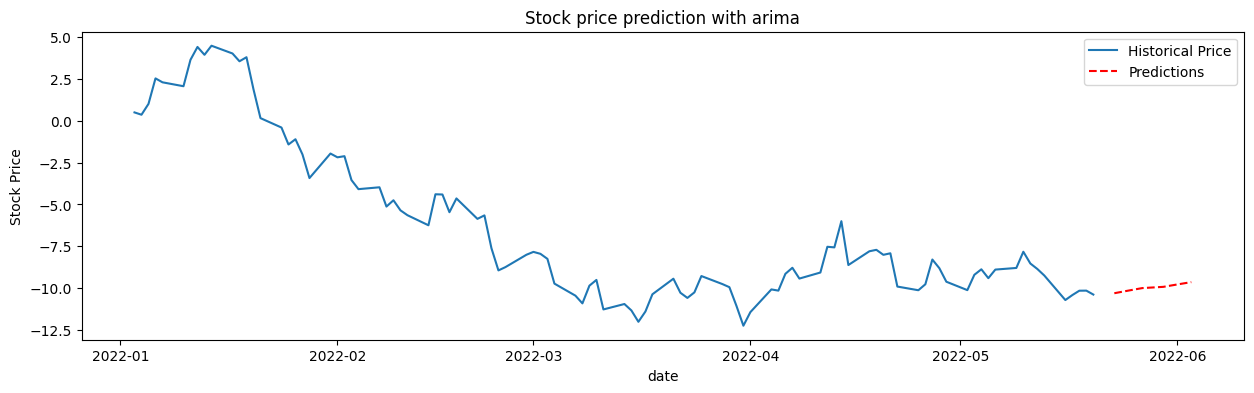

In [59]:
plt.figure(figsize=(15,4))
plt.plot(df['Price'],label='Historical Price')
plt.plot(future_dates,predictions,label='Predictions',linestyle='dashed',color='red')
plt.title('Stock price prediction with arima')
plt.xlabel('date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()